# TENSORFLOW 

**Tensorflow**, Google tarafından geliştirilen açık kaynaklı bir makine öğrenimi ve derin öğrenme kütüphanesidir. Bu sunumlarda Tensorflow [sitesindeki](https://www.tensorflow.org/tutorials) eğitimlerin anlatılması hedeflenmektedir. Tensorflow ile [Google colab](https://colab.google/) üzerinden kolaylıkla çalışmalarınızı yapabilirsiniz. Kendi geliştirme ortamınızda çalışmalarınızı sürdürecekseniz Tensorflow'un şuanda Python 3.7-3.11 arasında olan versiyonları desteklediğini hatırlatmak istedim.

Tensorflow ile yapılacak eğitimlere geçmeden temel olarak bazı terimlere değinelim.

### 🧠Derin Öğrenme

İnsan beynindeki nöronlardan esinlenelerek geliştirilen yapay sinir ağlarını temel alan bir makine öğrenimi yöntemidir.

#### Sinir Ağlarının Temel Yapısı

Sinir ağları 4 temel yapıdan oluşur. Bunlar nöron, katman(layer), ağ(network) ve aktivasyon fonksiyonudur.

- **Nöron**: Temel hesaplama birimi.
- **Katman(Layer)**:Birden fazla nöronun bir araya gelmesiyle katmanlar oluşur.
- **Ağ(Network)**: Katmanların bir araya gelmesiyle oluşur.
- **Aktivasyon Fonksiyonu**: Nöronun çıktısını belirler. Temel aktivasyon fonksiyonları; relu, sigmoid olarak bilinir.



### TensorFlow ile Görüntü Sınıflandırma

Bu çalışmada makine öğrenmesi dünyasının "Hello Word" ü sayılabilecek Fashıon MNSIT veri seti ile görüntü sınıflandırma çalışması yapılacaktır.


In [2]:
#Kütüphaneleri import edelim

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # tensorflow kütüphane versiyonu

2.19.0


In [8]:
#veri setini içeri aktarma

fashion_mnist = tf.keras.datasets.fashion_mnist # Fashion MNIST veri setine erişim sağlanıyor.

#veri setini eğitim(train) ve test verisi olacak şekilde ayırarak veri setini yüklüyoruz.
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Fashion MNIST veri setinde kategoriler şu şekildedir.

- 0-T-shirt/top
- 1-Trouser(Pantolon)
- 2-Pullover(Kazak)
- 3-Dress(Elbise)
- 4-Coat(Palto)
- 5-Sandal
- 6-Shirt(Gömlek)
- 7-Sneaker(Spor Ayakkabı)
- 8-Bag(Çanta)
- 9-Ankle boot(Bot)

Bu veri setinde 0-9 arasında değişen etiketler görüntünün temsil ettiği kategoriye karşılık geliyor.

In [9]:
#veri seti kategorilerini ifade eden liste oluşturulur
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
              'Shirt','Sneaker','Bag','Ankle Boot']

In [10]:
#eğitim veri setinin içeriğini öğrenelim. 
# Bu kod çalıştırıldığıda eğitim veri setinin 28*28 piksel 60000 adet etiketten oluştuğu görülür.

train_images.shape

(60000, 28, 28)

In [11]:
#eğitim veri setinin uzunluğu
len(train_labels)

60000

In [12]:
#eğitim veri setinin içerisinde kategorilerin 0-9 arasınnda ifade edildiği görülür.
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
test_images.shape


(10000, 28, 28)

In [19]:
len(test_labels)

10000

In [18]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

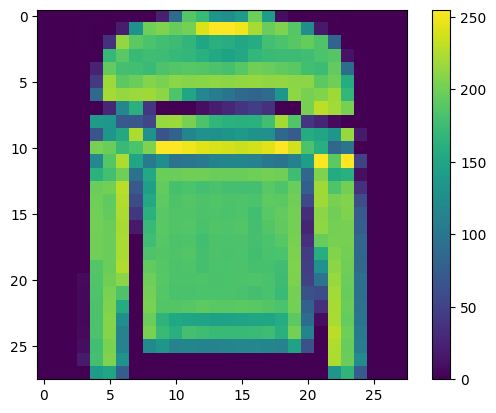

In [ ]:
#eğitim veri setinde istediğiniz bir görüntüyü görselleştirin. Aşağıda 5.indexteki görüntüyü görüyorsunuz.

plt.figure
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()



Yukarıda görüldüğü gibi eğitim veri setinin 5.indexindeki görüntünün 0-255 arasındaki değerler ile gösteriliyor. Burada veriyi sinir ağı modeli ile beslemeden önce 0-1 arasına indirgememiz gerekiyor. Bu nedenle hem eğitim hem test verisinin 255'e bölerek 0-255 aralığı ile ifade edilen görüntüleri 0-1 arasına indireceğiz.

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

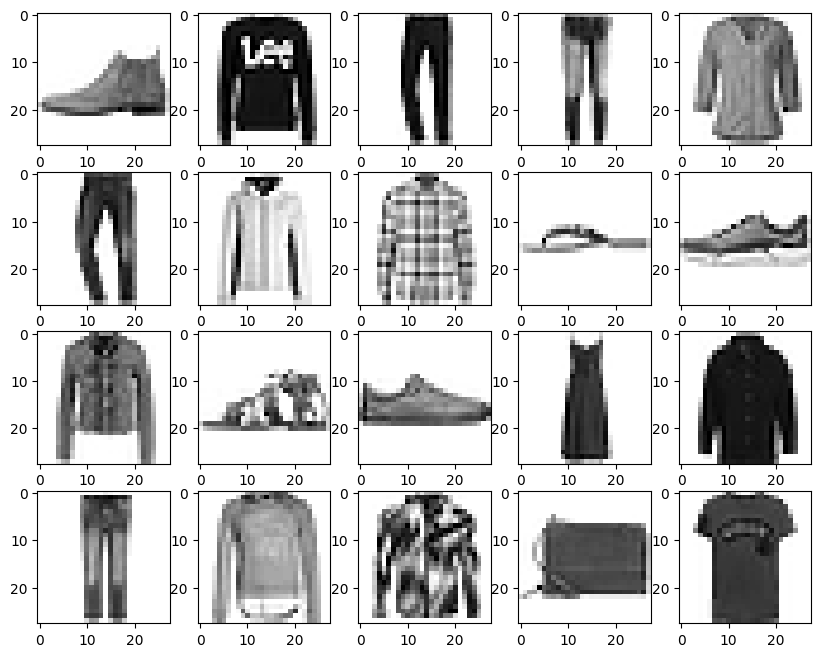

In [36]:
plt.figure(figsize=(10,10))
for i in range (20):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    
plt.show()

#bu kod bloğu çalııştırıldığında test verisinde görüntülerinin 
# 0-1 arasında ölçeklendirildiği görülür.

Burada kadar veri setimizi inceledik. Veri setini 0-1 arasına indirgedik. Şimdi modeli oluşturma adımına geldik. Sunumun başında **Sinir Ağlarının** temellerinden bahsetmiştik ve bir sinir ağının temel yapıtaşını nöron oluşturur.